**STUDENT SUCCESS PREDICTOR**


1. *Load and Understand the Data*

In [4]:
import pandas as pd
df = pd.read_csv("student_success_dataset.csv")
df.head()
print(f'Rows : {df.shape[0]}, Columns: {df.shape[1]}')
df.info()
df.describe(include='all')
df.isnull().sum()


Rows : 20, Columns: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB


StudyHours    0
Attendance    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64

2. *Preprocessing (clean Data)*

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Internet'] = le.fit_transform(df["Internet"])
df['Passed'] = le.fit_transform(df["Passed"])

print(df.head())
df.dtypes

   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0           2          60         40         1           5       0
1           5          80         60         0           6       1
2           8          90         75         1           8       1
3           3          70         50         1           5       0
4           7          85         70         0           7       1


StudyHours    int64
Attendance    int64
PastScore     int64
Internet      int64
SleepHours    int64
Passed        int64
dtype: object

3. *Featue Scaling*

In [7]:
from sklearn.preprocessing import StandardScaler

features = ['StudyHours','Attendance','PastScore','SleepHours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

x = df_scaled[features] # features 
y = df_scaled['Passed'] # target

4. *Split the data*

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


5. *Train a model*

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


6. *Make predictions*

In [10]:
y_pred = model.predict(x_test)

7. *Evaluate the model*

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report")
print(classification_report(y_test,y_pred))
conf_matrix = confusion_matrix(y_test,y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



8. *Visualise Results*

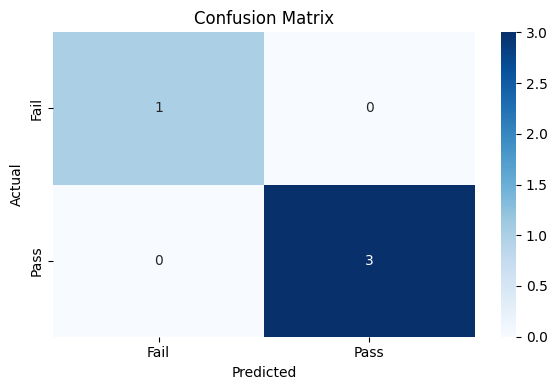

Predict Your result
Prediction Based on input : Pass


C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Fail","Pass"],yticklabels=["Fail","Pass"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print("Predict Your result")
try:
    study_hours = float(input("Enter study hours : "))
    attendance = float(input("Enter attendance : "))
    past_score = float(input("Enter past_score : "))
    sleep_hours = float(input("Enter sleep_hours : "))

    user_input_df = pd.DataFrame([[study_hours, attendance, past_score, sleep_hours]],
                             columns=['StudyHours', 'Attendance', 'PastScore', 'SleepHours'])

    user_input_scaled = scaler.transform(user_input_df)
    prediction = model.predict(user_input_scaled)[0]

    result = "Pass" if prediction == 1 else  "Fail"
    print(f"Prediction Based on input : {result}")
except Exception as e:
    print("An error occured : ",e)